# Data pre-processing

In [1]:
# Here to split raw data into two sets, training set & testing set (Holdout 1/3)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Read in csv file of raw traffic record
rec_df_raw = pd.read_csv("./data/tmdb_5000_features.csv")
buk_df_raw = pd.read_csv("./output/cast_bucket.csv")

In [4]:
buk_df = buk_df_raw[['cast_bucket']]
buk_df.head()

,cast_bucket
0,3
1,1
2,3
3,3
4,1


In [5]:
# Delete unwanted features, features: language cast_num cast_0 crew_num director genre_0 campany_0 country
rec_df =  rec_df_raw[['language', 'cast_num', 'cast_0', 'crew_num', 'director', 'genre_0', 'company_0', 'country']]
rec_df.insert(2, 'new_cast_num', buk_df['cast_bucket'])
rec_df.head()

,language,cast_num,new_cast_num,cast_0,crew_num,director,genre_0,company_0,country
0,en,83,3,Sam Worthington,153,James Cameron,Action,Ingenious Film Partners,US
1,en,34,1,Johnny Depp,32,Gore Verbinski,Adventure,Walt Disney Pictures,US
2,en,83,3,Daniel Craig,155,Sam Mendes,Action,Columbia Pictures,GB
3,en,158,3,Christian Bale,217,Christopher Nolan,Action,Legendary Pictures,US
4,en,27,1,Taylor Kitsch,132,Andrew Stanton,Action,Walt Disney Pictures,US


# Data Visualization

In [6]:
# Visualization for attribute crew_num
crew_num = rec_df[['crew_num']]
crew_ary = np.array(crew_num)
crew_num.head()

,crew_num
0,153
1,32
2,155
3,217
4,132


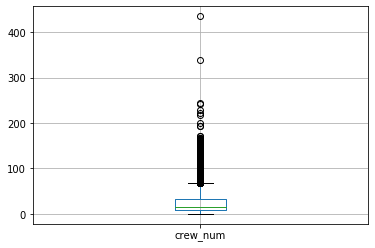

In [7]:
boxplot = crew_num.boxplot(column=['crew_num'])

In [8]:
# 25 percentile from 0 to 8 -> 0
np.percentile(crew_ary, 25)

8.0

In [9]:
# 50 percentile from 9 to 16 -> 1
np.median(crew_ary)

16.0

In [10]:
# 75 percentile from 17 to 32 -> 2
np.percentile(crew_ary, 75)

32.0

In [11]:
# 100 percentile from 32 to 435 -> 3
np.percentile(crew_ary, 100)

435.0

In [12]:
for index, row in crew_num.iterrows():
    num = row["crew_num"]
    if 0<=num and num<=8:
        row['crew_num'] = 0
    elif 8<num and num<=16:
        row['crew_num'] = 1
    elif 17<num and num<=32:
        row['crew_num'] = 2
    else:
        row['crew_num'] = 3

rec_df.insert(5, 'new_crew_num', crew_num['crew_num'])

In [13]:
rec_df.head()

,language,cast_num,new_cast_num,cast_0,crew_num,new_crew_num,director,genre_0,company_0,country
0,en,83,3,Sam Worthington,153,3,James Cameron,Action,Ingenious Film Partners,US
1,en,34,1,Johnny Depp,32,2,Gore Verbinski,Adventure,Walt Disney Pictures,US
2,en,83,3,Daniel Craig,155,3,Sam Mendes,Action,Columbia Pictures,GB
3,en,158,3,Christian Bale,217,3,Christopher Nolan,Action,Legendary Pictures,US
4,en,27,1,Taylor Kitsch,132,3,Andrew Stanton,Action,Walt Disney Pictures,US


In [14]:
# Raw 4790 movies, training 3194, testing 1596
train_df = rec_df.head(3194)
test_df = rec_df.head(1596)

# Categorical data vectorize

In [21]:
columns = ['language', 'cast_0', 'director', 'genre_0', 'company_0', 'country']

vectors = {}
# for each col
for col in columns:
    count = 0
    dic = {}
    result = []
    for cell in rec_df[col]:
        # find a match in dictionary
        if cell not in dic.keys():
            dic[cell] = count
            result.append(count)
            count += 1
        else:
            result.append(dic[cell])
    # insert each column into dictionary (for new dataframe)
    vectors[col] = result
        
# create a new dataframe
vector_df = pd.DataFrame(vectors)
# add the numeric columns
vector_df['cast_num'] = rec_df['new_cast_num']
vector_df['crew_num'] = rec_df['new_crew_num']
vector_df.head()

,language,cast_0,director,genre_0,company_0,country,cast_num,crew_num
0,0,0,0,0,0,0,3,3
1,0,1,1,1,1,0,1,2
2,0,2,2,0,2,1,3,3
3,0,3,3,0,3,0,3,3
4,0,4,4,0,1,0,1,3


In [22]:
# export the vector data to csv
vector_df.to_csv('chp5_classifiers/vector_data.csv', index=False)